In [10]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
insurance_data=pd.read_csv("insurance.csv")
x=insurance_data.drop(columns=["charges"])
y=insurance_data["charges"]
x=pd.get_dummies(x,columns=['region'],drop_first=True,dtype=int)

x['sex']=x['sex'].map({"female":1,"male":0})
x['smoker']=x['smoker'].map({"yes":1,"no":0})

x['age_smoker']=x['age']*x['smoker']
x["bmi_smoker"]=x["bmi"]*x["smoker"]

x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42)



Mean Squared value 20922599.87103596
Mean Squared value 20921803.698431376
Mean Squared value 20914832.635089137
Mean Squared value 20908106.77995452
Mean Squared value 20901927.931570224
Mean Squared value 20896130.811135653
Mean Squared value 20890881.000633497
Mean Squared value 20872844.794796687
Mean Squared value 20877828.53237883
Mean Squared value 20937537.133939773
Mean Squared value 22423172.68602325


<Axes: >

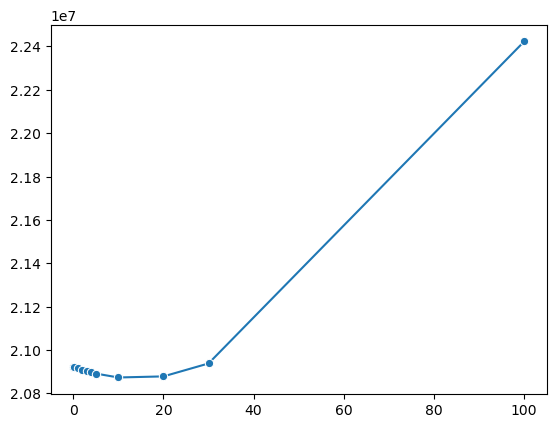

In [13]:
import seaborn as sns
alphas=[0.001,0.1,1,2,3,4,5,10,20,30,100]
mses=[]
for a in alphas:
    lasso_model=Lasso(alpha=a)
    lasso_model.fit(x_train,y_train)

    y_pred=lasso_model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    print("Mean Squared value",mse)
    mses.append(mse)
sns.lineplot(x=alphas,y=mses,marker="o")

In [24]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
a=[0.001,0.1,1,2,5,10,20,30,40,50,100]
lasso_cv_model=LassoCV(
    alphas=a,
    cv=5,
    max_iter=1000,
    random_state=42)
lasso_cv_model.fit(x_train,y_train)
print("best alphas:",lasso_cv_model.alpha_)

y_pred=lasso_cv_model.predict(x_test)
sme=mean_squared_error(y_test,y_pred)
print("mse=",sme)
r2= r2_score(y_test, y_pred)
print("r2=",r2)

best alphas: 0.001
mse= 20922599.87103596
r2= 0.8652317499151699
